# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [23]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [54]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key +"&q=" + city
    
    response = requests.get(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] - 273.15
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chegdomyn
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | badger
Processing Record 4 of Set 1 | nagqu
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | labrador city
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | fomboni
Processing Record 9 of Set 1 | mount isa
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | brisas barra de suchiate
Processing Record 12 of Set 1 | wailua homesteads
Processing Record 13 of Set 1 | petawawa
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | rio grande
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | fortuna
Processing Record 20 of Set 1 | waspan
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 o

Processing Record 43 of Set 4 | kirakira
Processing Record 44 of Set 4 | williamston
Processing Record 45 of Set 4 | gadzhiyevo
Processing Record 46 of Set 4 | arteche
Processing Record 47 of Set 4 | takoradi
Processing Record 48 of Set 4 | meulaboh
Processing Record 49 of Set 4 | saint-pierre
Processing Record 0 of Set 5 | kenora
Processing Record 1 of Set 5 | nandurbar
Processing Record 2 of Set 5 | nova sintra
Processing Record 3 of Set 5 | shangrao
Processing Record 4 of Set 5 | pangody
Processing Record 5 of Set 5 | katsuura
Processing Record 6 of Set 5 | sao vicente
Processing Record 7 of Set 5 | bengkulu
Processing Record 8 of Set 5 | al artawiyah
Processing Record 9 of Set 5 | aldinga beach
Processing Record 10 of Set 5 | selfoss
Processing Record 11 of Set 5 | enewetak
Processing Record 12 of Set 5 | phek
Processing Record 13 of Set 5 | udachny
Processing Record 14 of Set 5 | punta arenas
Processing Record 15 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 

Processing Record 32 of Set 8 | touros
Processing Record 33 of Set 8 | okhotsk
Processing Record 34 of Set 8 | mulayjah
Processing Record 35 of Set 8 | nakhon si thammarat
Processing Record 36 of Set 8 | egilsstadir
Processing Record 37 of Set 8 | port victoria
Processing Record 38 of Set 8 | san carlos de bariloche
Processing Record 39 of Set 8 | lata
Processing Record 40 of Set 8 | espargos
City not found. Skipping...
Processing Record 41 of Set 8 | hell-ville
Processing Record 42 of Set 8 | ust-nera
Processing Record 43 of Set 8 | coquimbo
Processing Record 44 of Set 8 | kristiansund
Processing Record 45 of Set 8 | khovd
Processing Record 46 of Set 8 | bathsheba
Processing Record 47 of Set 8 | nuuk
Processing Record 48 of Set 8 | kitimat
Processing Record 49 of Set 8 | phongsali
Processing Record 0 of Set 9 | la'ie
Processing Record 1 of Set 9 | labis
Processing Record 2 of Set 9 | ribeira brava
Processing Record 3 of Set 9 | crane
Processing Record 4 of Set 9 | weinzierl bei krems


Processing Record 21 of Set 12 | mambulo
Processing Record 22 of Set 12 | plastun
Processing Record 23 of Set 12 | kharp
Processing Record 24 of Set 12 | nyurba
Processing Record 25 of Set 12 | urumqi
Processing Record 26 of Set 12 | yanbu
Processing Record 27 of Set 12 | amos
Processing Record 28 of Set 12 | barra de santo antonio
Processing Record 29 of Set 12 | kievka
Processing Record 30 of Set 12 | shambu
Processing Record 31 of Set 12 | araguaina
Processing Record 32 of Set 12 | kuala terengganu
Processing Record 33 of Set 12 | tabor
Processing Record 34 of Set 12 | jerome
Processing Record 35 of Set 12 | salinas
Processing Record 36 of Set 12 | douentza
Processing Record 37 of Set 12 | willis
Processing Record 38 of Set 12 | veliko turnovo
Processing Record 39 of Set 12 | soc trang
Processing Record 40 of Set 12 | mogadishu
Processing Record 41 of Set 12 | broome
Processing Record 42 of Set 12 | naze
Processing Record 43 of Set 12 | ilebo
Processing Record 44 of Set 12 | trinida

In [55]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [56]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chegdomyn,51.1167,133.0167,-29.14,100,37,1.04,RU,1708797140
1,hithadhoo,-0.6000,73.0833,28.32,79,91,6.32,MV,1708797140
2,badger,64.8000,-147.5333,-18.86,81,0,0.00,US,1708797140
3,nagqu,31.5000,92.0000,-8.96,37,85,9.02,CN,1708797141
4,waitangi,-43.9535,-176.5597,17.12,94,100,2.24,NZ,1708797141


In [57]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [59]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chegdomyn,51.1167,133.0167,-29.14,100,37,1.04,RU,1708797140
1,hithadhoo,-0.6000,73.0833,28.32,79,91,6.32,MV,1708797140
2,badger,64.8000,-147.5333,-18.86,81,0,0.00,US,1708797140
3,nagqu,31.5000,92.0000,-8.96,37,85,9.02,CN,1708797141
4,waitangi,-43.9535,-176.5597,17.12,94,100,2.24,NZ,1708797141


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

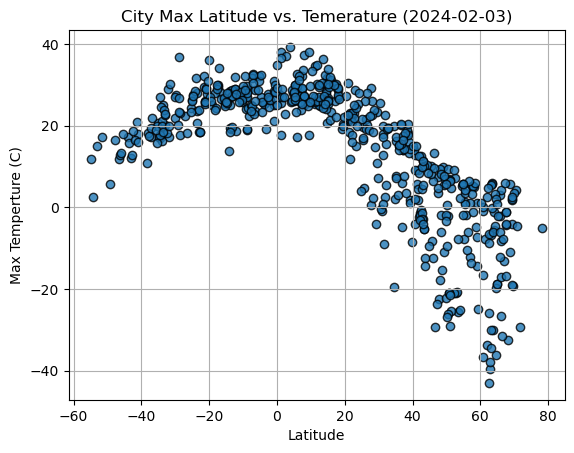

In [60]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temerature (2024-02-03)")
plt.ylabel("Max Temperture (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

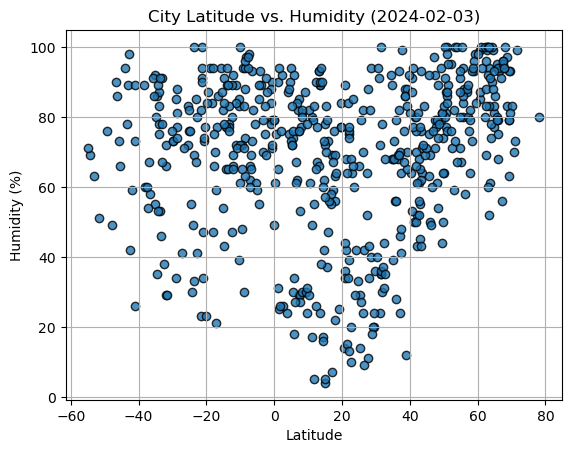

In [45]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-02-03)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

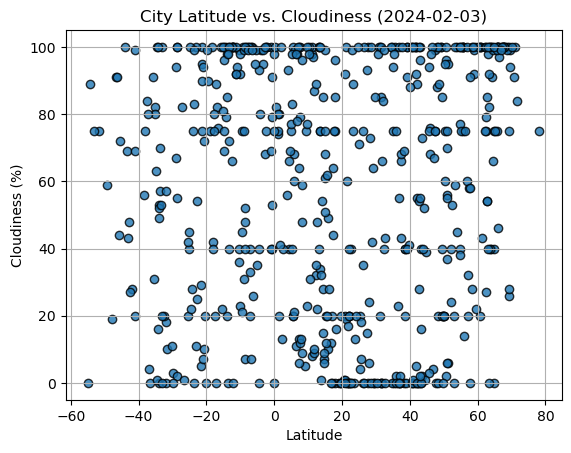

In [61]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-02-03)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
    
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

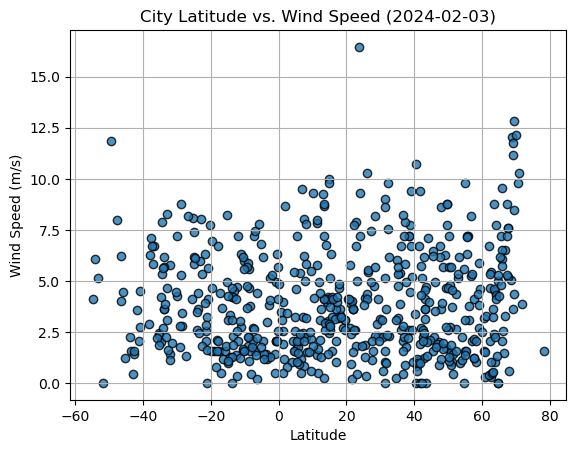

In [62]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-02-03)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [63]:
# Define a function to create Linear Regression plots
# Build scatter plot for latitude vs. temperature
# plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.8)
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

y = -0.35x +20.42
City_ID
0       2.478329
1      20.634772
2      -2.325536
3       9.365263
4      35.855103
         ...    
572     0.362611
573     5.299919
574    15.493172
575     2.484192
576    25.245546
Name: Lat, Length: 577, dtype: float64


In [64]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chegdomyn,51.1167,133.0167,-29.14,100,37,1.04,RU,1708797140
2,badger,64.8000,-147.5333,-18.86,81,0,0.00,US,1708797140
3,nagqu,31.5000,92.0000,-8.96,37,85,9.02,CN,1708797141
5,labrador city,52.9463,-66.9114,-21.05,59,20,5.14,CA,1708797141
10,brisas barra de suchiate,14.5500,-92.2167,28.52,62,7,4.23,MX,1708797143


In [65]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hithadhoo,-0.6000,73.0833,28.32,79,91,6.32,MV,1708797140
4,waitangi,-43.9535,-176.5597,17.12,94,100,2.24,NZ,1708797141
6,edinburgh of the seven seas,-37.0676,-12.3116,17.30,67,4,5.82,SH,1708797142
7,fomboni,-12.2800,43.7425,29.02,69,100,0.35,KM,1708797142
8,mount isa,-20.7333,139.5000,25.87,73,10,4.12,AU,1708797142


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.672919402190384


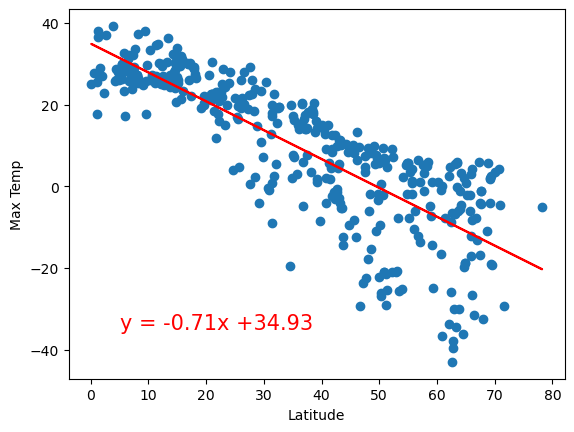

In [102]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(5,-35),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

The r-value is: 0.44994922448678853


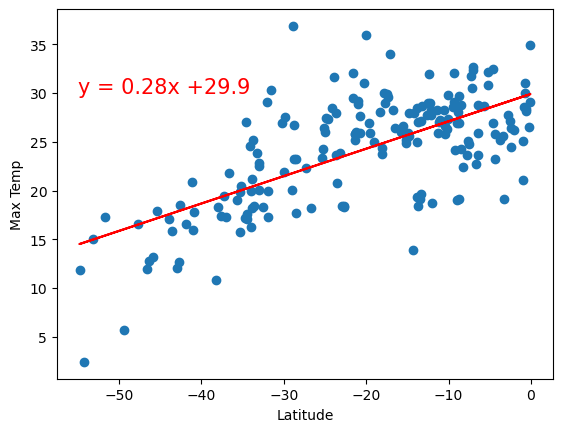

In [84]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** The closer the latitude is to 0 the temperature increases, the further the latitude is the tempeture decreases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.19204090954295436


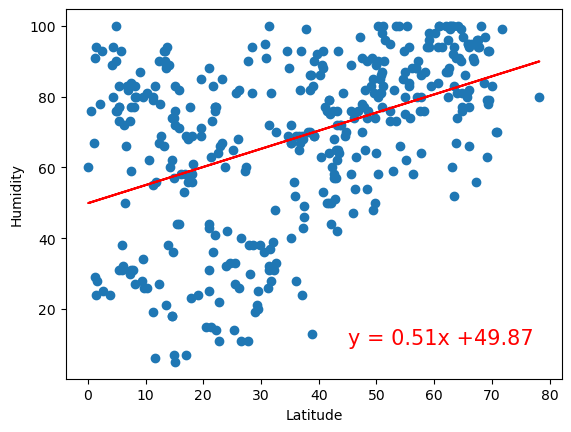

In [103]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()

The r-value is: 0.036819636012085356


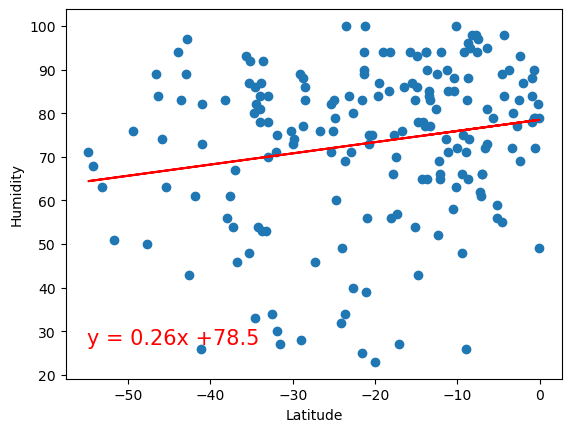

In [93]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values =southern_hemi_df["Humidity"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-55,27),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** The Northern hemisphere has a stronger linear relationship between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05225809764190028


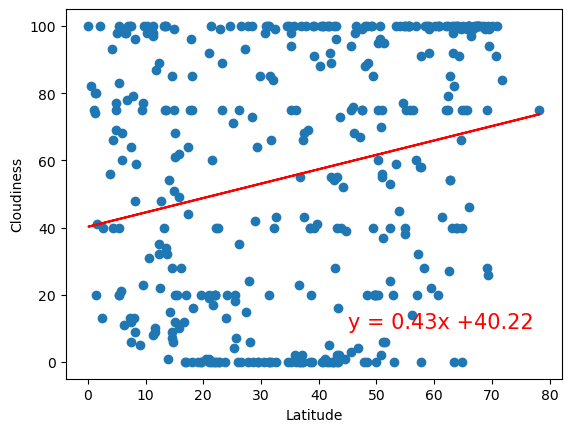

In [104]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig9.png")

# Show plot
plt.show()

The r-value is: 0.04393560732243721


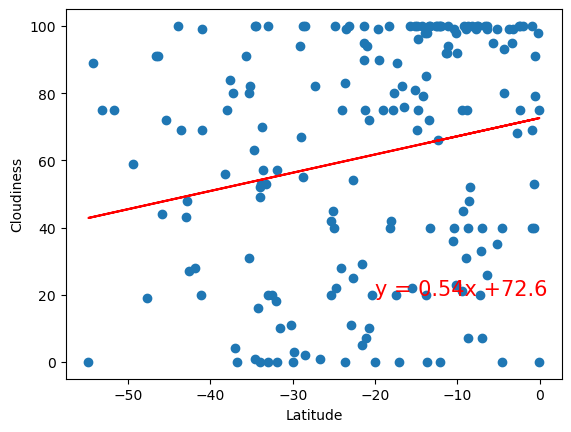

In [105]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-20,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Both r-values indicate a weak linear relationship between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.012303777719550074


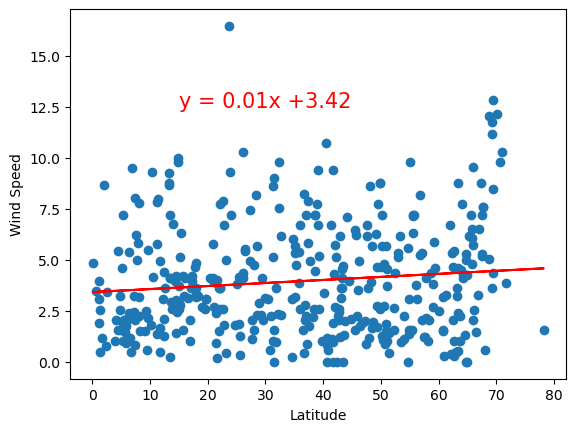

In [106]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(15,12.5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()

The r-value is: 0.030977310392508745


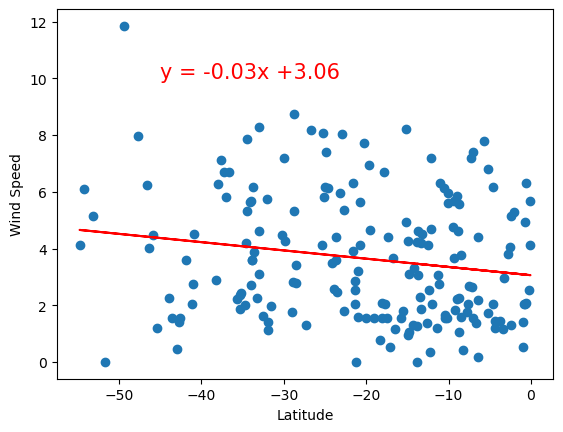

In [107]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-45,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** The Southern hemisphere has a stronger linear relationship to wind speed then the Northern hemisphere.

In [101]:
# Perform linear regression for the Northern Hemisphere
slope_north, intercept_north, rvalue_north, _, _ = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
r_squared_north = rvalue_north ** 2

# Perform linear regression for the Southern Hemisphere
slope_south, intercept_south, rvalue_south, _, _ = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
r_squared_south = rvalue_south ** 2

# Compare r-values
if r_squared_north > r_squared_south:
    print("The Northern Hemisphere has a stronger linear relationship with wind speed.")
elif r_squared_north < r_squared_south:
    print("The Southern Hemisphere has a stronger linear relationship with wind speed.")
else:
    print("Both hemispheres have similar linear relationships with wind speed.")

The Southern Hemisphere has a stronger linear relationship with wind speed.
